# Kaggle's Blue Book for Bulldozers
- https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview


#### 1. Problem Definition
   - How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for
    
#### 2. Data 
- Data is from kaggle Bluebook for Bulldozers competetion.  
 - https://www.kaggle.com/competitions/bluebook-for-bulldozers/data

    - Train.csv is the training set, which contains data through the end of 2011.
    - Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
    - Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

#### 3. Features
- Kaggle offers a data dictionary of all features of the dataset.

- The key fields are in train.csv are:
    - SalesID: the uniue identifier of the sale
    - MachineID: the unique identifier of a machine.  A machine can be sold multiple times
    - saleprice: what the machine sold for at auction (only provided in train.csv)
    - saledate: the date of the sale
- There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.


### Import Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import xgboost
import catboost as cb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error,mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Import Data

In [2]:
df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",
                 parse_dates=["saledate"] ) 

df.head(5).T

/var/folders/px/5m8j76fj1bnbd7y2t1xn4plr0000gn/T/ipykernel_2609/1630727057.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("bluebook-for-bulldozers/TrainAndValid.csv",


,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


# Exploratory data analysis
- 1. What kinds of data do we have? 
- 2. Is there missing data?
- 3. What are the outliers?
- 4. How can you add, change or remove features to get more out of your data?




In [3]:
#check for null values
df.isna().sum()

#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

### Observations: 
- Data types consist of integers, floats, objects, and datetime
- Dataset includes null values
- Dataset consists of 412698 entries 

## Finding patterns within columns 

### Saledate to Saleprice

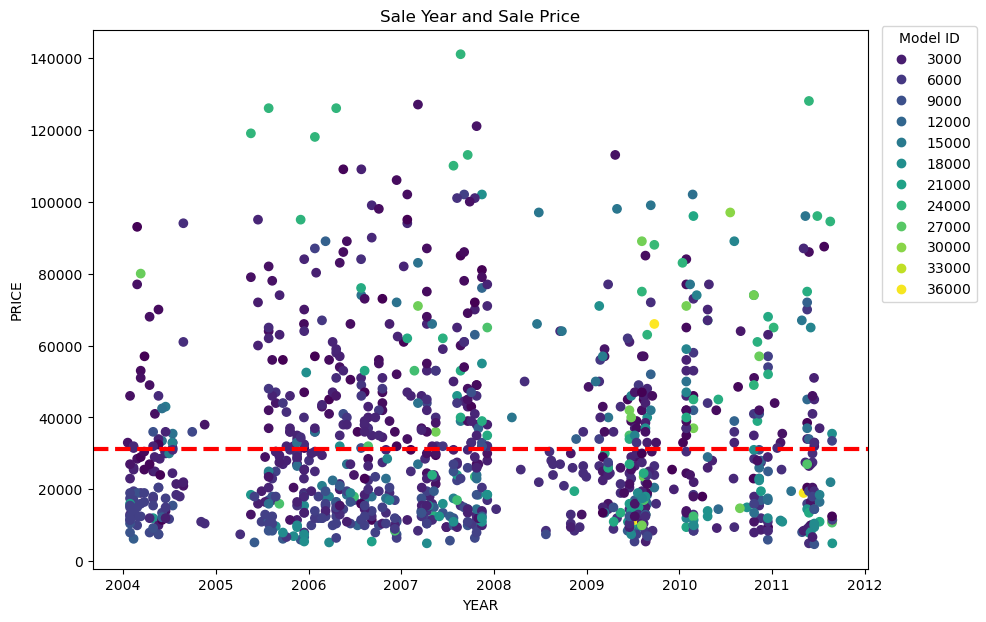

In [4]:
fig,ax = plt.subplots(figsize = (10,7))


#create a scatter plot of saledate and saleprice
scatter = ax.scatter(df["saledate"].head(1000), df["SalePrice"].head(1000), c = df["ModelID"].head(1000))


#customize plot
ax.set(title= "Sale Year and Sale Price",
      xlabel="YEAR",
      ylabel="PRICE",
);
ax.legend(*scatter.legend_elements(), 
          title = "Model ID",
         bbox_to_anchor=(1.15, 1.02));

#draw price meanline
ax.axhline(df["SalePrice"].mean(), 
           linestyle = "--" , c= "red", linewidth = 3
              );


### Observations:
- The distribution of all sales over the years is relatively balanced.
- The distribution of lower-end and higher-end sales is relatively even with lower ends sales being more frequent and consistent.
- 90 percent of the sale prices are below 65,000 with the average close to 30,000



### Duplicate DataFrame and sort by saledate

In [5]:
df_copy = df.sort_values(by= "saledate")

# Preprocessing

### Feature Engineering - Data enriching

 - Through the saledate column, we can assign month, day, day of week and year as new columns to engineer futher data for the model to learn and understand patterns. 


In [6]:
#additional columns 
df_copy["SaleYear"] = df_copy.saledate.dt.year
df_copy["SaleMonth"] = df_copy.saledate.dt.month
df_copy["SaleDay"] = df_copy.saledate.dt.day
df_copy["SaleDayOfWeek"] = df_copy.saledate.dt.day_of_week
df_copy["SaleDayOfYear"] = df_copy.saledate.dt.day_of_year

#drop saledate
df_copy.drop("saledate", axis = 1, inplace=True)

### Transform String Columns
- from Objects to Categories

In [7]:
# for loop checks and tallies up the count of string datatypes

total = 0
for k,v in df_copy.items():
    if pd.api.types.is_string_dtype(v.dtype):
            total = total + 1 
print(f"Total number of string dtype columns: {total}")



# for loop checks converts datatype to category

count = 0
for k, v in df_copy.items():
    if pd.api.types.is_string_dtype(v.dtype):
        df_copy[k] = df_copy[k].astype("category")
        count = count + 1
print(f"Total number of columns converted to category dtype: {count}")


Total number of string dtype columns: 44
Total number of columns converted to category dtype: 44


## Train and Validation Split

- Assign 2012 sales to validation data and the remaining to train data

In [8]:
X_train = df_copy[df_copy["SaleYear"] != 2012].drop("SalePrice", axis = 1)
y_train = df_copy[df_copy["SaleYear"] != 2012].SalePrice

X_valid = df_copy[df_copy["SaleYear"] == 2012].drop("SalePrice", axis = 1)
y_valid = df_copy[df_copy["SaleYear"] == 2012].SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 56), (401125,), (11573, 56), (11573,))

###  Transform Train and Validation data

- Fill numerical column's missing values with column's median
- Turn categorical columns, label encoded
- Insert additional null value binary columns to show whether original sample had missing value   

In [9]:
# X_train numerical data 

for cols, info in X_train.items(): # for all columns in dataset
    if pd.api.types.is_numeric_dtype(info): # if column is numeric
        if X_train[cols].isna().sum(): #if the numeric column has null values
            X_train[cols+ "_missing"] = X_train[cols].isna() #new boolean columns showing if values were missing
            X_train[cols].fillna(X_train[cols].median(), inplace=True) #fill all null numeric cols with cols median
      
    
# X_train categorical data  

for cols, info in X_train.items(): # for all columns in dataset
    if not pd.api.types.is_numeric_dtype(info): # if column is not numeric
             X_train[cols+ "_missing"] = X_train[cols].isna() #new boolean columns showing if values were missing
             X_train[cols] = info.cat.codes+1 #assigns columns vals to their categorical index codes (plus 1 for null vals (-1 to 0))


        
        
# X_valid numerical data

for cols, info in X_valid.items(): # for all columns in dataset
    if pd.api.types.is_numeric_dtype(info): # if column is numeric
        if X_valid[cols].isna().sum(): #if the numeric column has null values
            X_valid[cols+ "_missing"] = X_valid[cols].isna() #new boolean columns showing if values were missing
            X_valid[cols].fillna(X_valid[cols].median(), inplace=True) #fill all null numeric cols with cols median
            
          
        

# X_valid categorical data 

for cols, info in X_valid.items(): # for all columns in dataset
    if not pd.api.types.is_numeric_dtype(info): # if column is not numeric
             X_valid[cols+ "_missing"] = X_valid[cols].isna() #new boolean columns showing if values were missing
             X_valid[cols] = info.cat.codes+1 #assigns columns vals to their categorical index codes (plus 1 for null vals (-1 to 0))


            

### Train and Validation dataset comparisons

In [10]:
print(X_train.shape, X_valid.shape)
print(f'\n Columns missing from validation dataset: {set(X_train) - set(X_valid)}')

(401125, 102) (11573, 101)

 Columns missing from validation dataset: {'auctioneerID_missing'}


### Key note: 
 - The 'auctioneerID_missing' column is not in the validation dataset since the "auctioneerID" column does not have null values. It has to be added manually to match the shape of data the model trains on.

In [12]:
pos = list(X_train.columns).index("auctioneerID_missing")
X_valid.insert(pos, 'auctioneerID_missing', X_valid["auctioneerID"].isna())

### Functionize Preprocessing Steps

In [11]:
def data_preprocessing(df):
    """
    Transforms and returns the df in the expected format for
    the model to make predictions.
    
    """
    
    #feature engineering
    df["SaleYear"] = df.saledate.dt.year
    df["SaleMonth"] = df.saledate.dt.month
    df["SaleDay"] = df.saledate.dt.day
    df["SaleDayOfWeek"] = df.saledate.dt.day_of_week
    df["SaleDayOfYear"] = df.saledate.dt.day_of_year
    
    #drop saledate
    df.drop("saledate", axis = 1, inplace=True)
        
    
    #convert objects to categories
    for cols, info in df.items():
        if pd.api.types.is_string_dtype(info):
            df[cols] = df[cols].astype("category")
    
            
    #fill missing values with the columns median       
    for cols, info in df.items():
        if pd.api.types.is_numeric_dtype(info):
            if info.isna().sum():
                df[cols].fillna(df[cols].median(), inplace=True)


    #convert categorical values to their codes + 1 and insert new columns
        if not pd.api.types.is_numeric_dtype(info):
            df[cols+"_missing"] = df[cols].isna()
            df[cols] = df[cols].cat.codes + 1

    return df

    

# Model Fit and Evaluation

- Fit data using RandomForestRegressor model
    - on 10000 samples
- Create an Evaluation function that returns the following scoring metrics on both train and validation data.
    - Accuracy (r2),
    - Mean Absolute Error, 
    - Mean Squared Error
    - Root Mean Squared Logarithmic Error (RMSLE)

In [13]:
model = RandomForestRegressor(n_jobs= -1,
                              max_samples=10000)

In [14]:
def model_evaluations(model, X_train, y_train, X_valid, y_valid):
    
    '''
    calculates root mean squared log error, mean absolute error, mean squared error, 
    and r^2 for train and validation data
    '''
    
    
    #fit the model
    model.fit(X_train, y_train) #fit the model on training data
    
    #make predictions
    y_preds_train = model.predict(X_train) #predictions on train data
    y_preds_val = model.predict(X_valid) #predictions on val data

    
    #evaluate predictions
    r2_train = r2_score(y_train, y_preds_train)
    r2_valid = r2_score(y_valid, y_preds_val)
    MAE_train = mean_absolute_error(y_train, y_preds_train)
    MAE_valid = mean_absolute_error(y_valid, y_preds_val)
    MSE_train = mean_squared_error(y_train, y_preds_train)
    MSE_valid = mean_squared_error(y_valid, y_preds_val)
    RMSLE_train = np.sqrt(mean_squared_log_error(y_train, y_preds_train))
    RMSLE_valid = np.sqrt(mean_squared_log_error(y_valid, y_preds_val))
   
    
     
    #assign scores to dictionary values   
    scores = {
        
              "Accuracy_train_data": r2_train,
              "Accuracy_validation_data": r2_valid,
              "MAE_train_data": MAE_train,
              "MAE_validation_data":MAE_valid,
              "MSE_train_data": MSE_train,
              "MSE_validation_data":MSE_valid,
              "RMSLE_score_train_data": RMSLE_train,
              "RMSLE_score_validation_data": RMSLE_valid,
                        
          }
                          
    return scores

In [15]:
%%time
model_evaluations(model,X_train, y_train, X_valid, y_valid )

CPU times: user 34.4 s, sys: 480 ms, total: 34.8 s
Wall time: 5.23 s


{'Accuracy_train_data': 0.8607315367953408,
 'Accuracy_validation_data': 0.8324404508237813,
 'MAE_train_data': 5557.778685646618,
 'MAE_validation_data': 7167.899125550851,
 'MSE_train_data': 73909407.08873495,
 'MSE_validation_data': 115092032.02591865,
 'RMSLE_score_train_data': 0.2575132033204654,
 'RMSLE_score_validation_data': 0.2939065323827565}

# Hyperparameter Tuning Random Forest Regressor

-  Find the best parameters for RandomForestRegressor using RandomSearchCV 
    - 5 iterations 
    - 5 cross validation splits
    
- Train and evaluate RandomForestRegressor model using ideal parameters on all data
    

In [16]:
#different RandomForestRegressor hyperparameters
grid_rf = {
    
    "n_estimators": np.arange(10,100, 10),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
    "max_features":[0.5, "auto", "sqrt"],
    "max_samples": [10000] 
    
}


#create random search CV model
model_rs = RandomizedSearchCV(estimator=model,
                              param_distributions=grid_rf,
                              n_iter=5,
                              cv = 5,
                              n_jobs= -1,
                              verbose=False
                         )

#fit and evaluate random search CV model
model_evaluations(model_rs,X_train, y_train, X_valid, y_valid)

#best random search CV model parameters
model_rs.best_params_

#create ideal model using random search cv best parameters
ideal_model_rf = RandomForestRegressor(n_estimators=60,                                    
                                    min_samples_split=12,
                                    min_samples_leaf=1,
                                    max_features="auto",
                                    n_jobs=-1,
                                    max_depth= None,
                                    max_samples=None)

#fit and evaluate ideal model
ideal_rf_model_evaluations  = model_evaluations(ideal_model_rf, X_train, y_train, X_valid, y_valid)


/Users/suranjitmohajan/anaconda3/envs/py3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [17]:
ideal_rf_model_evaluations

{'Accuracy_train_data': 0.9657110646708795,
 'Accuracy_validation_data': 0.8724563957369447,
 'MAE_train_data': 2656.241703064204,
 'MAE_validation_data': 6119.11060552134,
 'MSE_train_data': 18197047.785004098,
 'MSE_validation_data': 87606183.34623717,
 'RMSLE_score_train_data': 0.13229738478976016,
 'RMSLE_score_validation_data': 0.25224177406956416}


# Hyperparameter Tuning CatBoost Regressor

-  Find the best parameters for CatBoost model using RandomSearchCV 
    - 5 iterations 
    - 5 cross validation splits
    
- Train and evaluate CatBoost model using ideal parameters on all data

### Instantiate and fit model

In [35]:
#create train and validation datasets
train_dataset = cb.Pool(X_train, y_train) 
validation_dataset = cb.Pool(X_valid, y_valid)

#instantiate catboost model
model = cb.CatBoostRegressor()

#catboost parameter grid
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

#fit random search CV model 
model.randomized_search(grid, 
                        train_dataset, 
                        n_iter= 5,
                        cv = 5, 
                        train_size = 0.025,
                        verbose = 0)

#random search CV best parameters
model.get_params()

#create ideal catboost model
ideal_model_catboost = cb.CatBoostRegressor(loss_function='RMSE',
                                           depth=8,
                                           iterations = 100,
                                           learning_rate = 0.1,
                                           l2_leaf_reg= 0.5,
                                           verbose=False
                                        
                                           )

#fit ideal catboost model
ideal_model_catboost.fit(X_train, y_train)

/Users/suranjitmohajan/anaconda3/envs/py3/lib/python3.10/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


### Predict and evaluate using Ideal CatBoost model

In [37]:
#make predictions
y_preds_train = ideal_model_catboost.predict(X_train) #predictions on train data
y_preds_val = ideal_model_catboost.predict(X_valid) #predictions on val data

#evaluate predictions
r2_train = r2_score(y_train, y_preds_train)
r2_valid = r2_score(y_valid, y_preds_val)
MAE_train = mean_absolute_error(y_train, y_preds_train)
MAE_valid = mean_absolute_error(y_valid, y_preds_val)
MSE_train = mean_squared_error(y_train, y_preds_train)
MSE_valid = mean_squared_error(y_valid, y_preds_val)
RMSLE_train = np.sqrt(mean_squared_log_error(y_train, y_preds_train))
RMSLE_valid = np.sqrt(mean_squared_log_error(y_valid, y_preds_val))

#assign scores to dictionary values   
ideal_catboost_model_evaluations = {
          "Accuracy_train_data": r2_train,
          "Accuracy_validation_data": r2_valid,
          "MAE_train_data": MAE_train,
          "MAE_validation_data":MAE_valid,
          "MSE_train_data": MSE_train,
          "MSE_validation_data":MSE_valid,
          "RMSLE_score_train_data": RMSLE_train,
          "RMSLE_score_validation_data": RMSLE_valid,
                        
      }

In [38]:
ideal_catboost_model_evaluations

{'Accuracy_train_data': 0.8445783163459538,
 'Accuracy_validation_data': 0.8270851707546965,
 'MAE_train_data': 6050.300426296968,
 'MAE_validation_data': 7408.834106985323,
 'MSE_train_data': 82481878.691537,
 'MSE_validation_data': 118770426.17444117,
 'RMSLE_score_train_data': 0.2827607438344882,
 'RMSLE_score_validation_data': 0.31104466897005895}

### Observation: 
- CatBoost Regressor was not able to outperform Random Forest Regressor.


# Hyperparameter Tuning XGBoost Regressor

-  Find the best parameters for XGBoost model using RandomSearchCV 
    - 5 iterations 
    - 5 cross validation splits
    
- Train and evaluate XGBoost model using ideal parameters on all data

In [33]:
#different Xgboost model hyperparameters
grid = {
    "n_estimators": np.arange(10,100, 10),
    "max_depth": [None, 3, 5, 10],    
    "eta" : [0.1, 0.2],
    "colsample_bytree": [0.8, 0.6],
    "subsample": [0.025],
 }

#create random search CV model 
xgboost_model = RandomizedSearchCV(estimator=XGBRegressor(),
                              param_distributions=grid,
                              n_iter=5,
                              cv = 5,
                              n_jobs= -1,
                              verbose=False
                         )

#fit and evaluate model
xgboost_model_evaluations = model_evaluations(xgboost_model,X_train, y_train, X_valid, y_valid)

#xgboost model best parameters
xgboost_model.best_params_

#create ideal xgboost model 
ideal_model_xgboost = XGBRegressor(n_estimators = 70, max_depth = 10,
                    eta = 0.1, colsample_bytree = 0.6, n_jobs = -1, verbose = False)

#fit and evaluate ideal xgboost model
ideal_xgboost_model_evaluations = model_evaluations(ideal_model_xgboost,X_train, y_train, X_valid, y_valid)


[20:50:13] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_b2k4a2hea3/croot/xgboost-split_1675457783214/work/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



In [34]:
ideal_xgboost_model_evaluations

{'Accuracy_train_data': 0.9208325526940461,
 'Accuracy_validation_data': 0.8813585598541003,
 'MAE_train_data': 4282.114668415492,
 'MAE_validation_data': 6102.5377318924575,
 'MSE_train_data': 42013956.04195889,
 'MSE_validation_data': 81491532.38955459,
 'RMSLE_score_train_data': 0.20885776477308687,
 'RMSLE_score_validation_data': 0.2584266077001319}

### Observation: 
- XGBoost and Random Forest Regressor scores are relatively close with Random Forest having a slightly better RMSLE metric score.



## Predictions on Test Data using Ideal Random Forest Regressor 

### Import and preprocess test data

In [22]:
#import test data
X_test = pd.read_csv("bluebook-for-bulldozers/Test.csv",
                     parse_dates=["saledate"])

#preprocess test data
data_preprocessing(X_test)

print(f' Missing columns: {set(X_train) - set (X_test)}')

 Missing columns: {'auctioneerID_missing', 'MachineHoursCurrentMeter_missing'}


### Insert missing columns


In [23]:
pos_1 = list(X_train.columns).index("MachineHoursCurrentMeter_missing")
X_test.insert(pos_1, "MachineHoursCurrentMeter_missing", X_test.MachineHoursCurrentMeter.isna())

pos_2 = list(X_train.columns).index("auctioneerID_missing")
X_test.insert(pos_2, "auctioneerID_missing", X_test.auctioneerID.isna())

X_test=X_test.reindex(columns=list(X_train.columns))
list(X_train.columns) == list(X_test.columns)

True

### Predict SalePrice using ideal XGBoost model

In [24]:
y_preds_test = np.round(ideal_model_rf.predict(X_test), 2)

### Create DataFrame with Kaggle submission requirements

In [25]:
#create test dataframe
df_test = pd.DataFrame(X_test)
df_test["SalePrice"] = y_preds_test

#create submission dataframe
df_kaggle = pd.DataFrame([df_test.SalesID, df_test.SalePrice]).T

#export to csv
df_kaggle.to_csv("bluebook-for-bulldozers/predictions.csv", index=False)

### Feature Importance 

- Create a function that displays the top n number of features and their importance in ascending order. 

In [29]:
df_feature_importance = pd.DataFrame([ideal_model_rf.feature_importances_],
             columns=df_test.drop("SalePrice", axis = 1).columns,
                index = ["feature_importance"]).T

df_feature_importance.sort_values(by="feature_importance",ascending=False, inplace=True)

In [30]:
def feature_importance(n = 40):
    
    '''
     Displays n number of features and their importance in ascending order
    '''

    df_feature_importance[:n].plot.barh(legend = False, figsize = (13,10))
    plt.title ("Feature Importance")
    plt.xlabel ("Importance")
    plt.ylabel ("Features")
    plt.show()

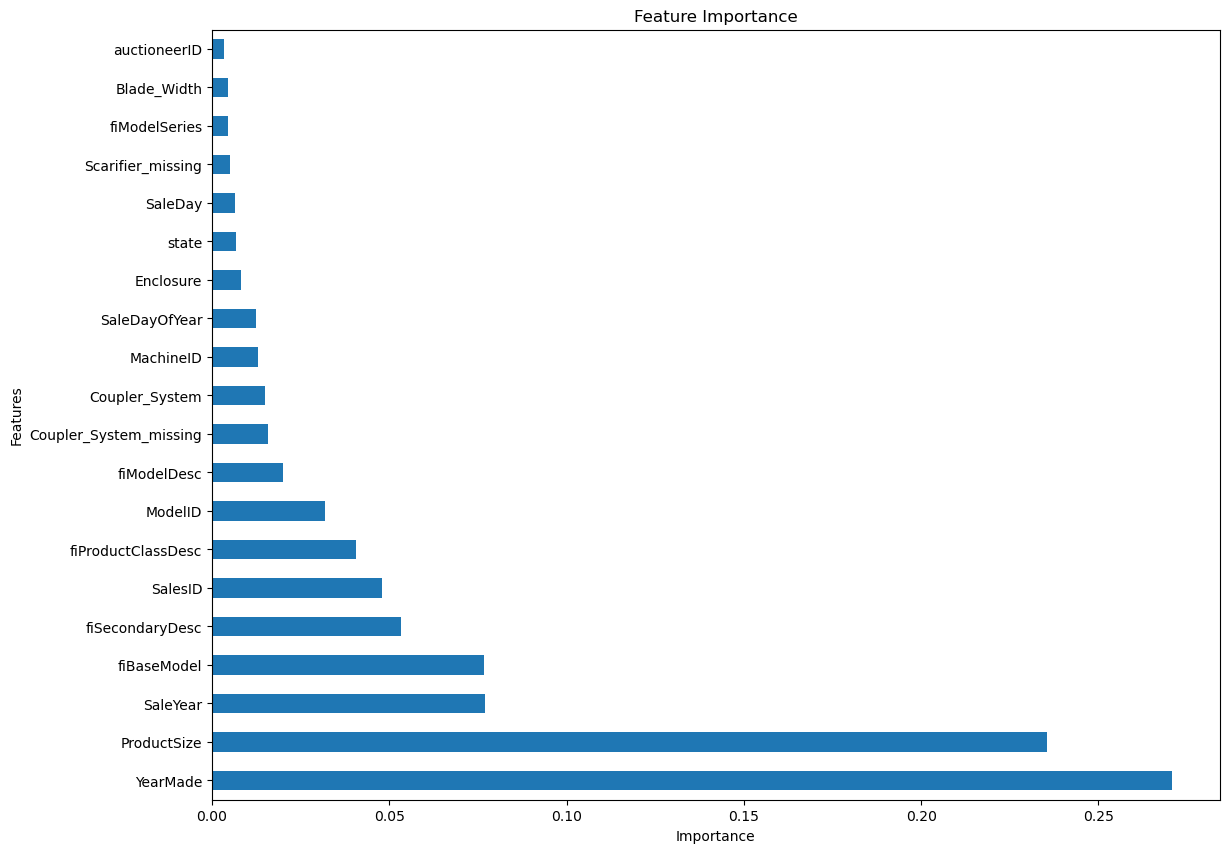

In [31]:
feature_importance(20)